# Regresión Polinomial

Problema una empresa desea llenar una vacante y RRHH está entrevistando a un candidato que parece cumplir con todo lo que se desea.  Al preguntarle cuáles son sus expectativas de salario indica que 160,000 al año.  Cuando se le pregunta porqué, indica que eso era lo que ganaba en la empresa XYZ.  RRHH desea saber si este candidato esta diciendo la verdad, o no.

De casualidad, RRHH tiene la escala de salarios de la empresa XYZ (el conjunto de datos) en LinkedIn logró determinar que esta persona tenía el cargo de Gerente Regional.  Esto es el nivel 6 en la escala salarial y con la experiencia que tiene el candidato (varios años) lo que está pidiendo no está tan fuera de escala.

Para ver mejor lo que se podría ofrecer, decide probar una regresión polinomial utilizando un nivel salarial de 6.5.

Para ver la diferencia entre una Regresión Polinomial y una Regresión Lineal se probarán los dos modelos y compararán los resultados

## Importar las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el conjunto de datos

In [2]:
datos = pd.read_csv('Position_Salaries.csv')
datos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = datos.iloc[:, 1:-1].values
y = datos.iloc[:, -1].values

In [4]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Entrenar el modelo de Regresión Linal sobre el conjunto de datos completo.  

Esto porque son muy pocos datos y se quiere aprovechar todo lo posible para entrenamiento

In [5]:
from sklearn.linear_model import LinearRegression
regresor_lin = LinearRegression()
regresor_lin.fit(X, y)

LinearRegression()

## Entrenar el modelo de Regresión Polinomial sobre el conjunto de datos completo.

Recordar que X contiene solo la variable independiente.  Para usar la regresión polinomial, necesitamos "transformar" el arreglo X a un arreglo que contenga la variable independiente en sus diferentes potencias.  Para esto se usa el **PolynomialFeatures**

Vamos a hacer la regresión en 2 partes.  La primera es para convertir el arreglo X a uno que tenga todos los valores a las diferentes potencias...un nuevo arreglo de variables.  Teniendo esto, usamos una regresión lineal con este nuevo arreglo (Parte 2).  Para el grado de la ecuación probaremos primero con 2 y luego 3 y 4

In [16]:
from sklearn.preprocessing import PolynomialFeatures
# Parte 1
regresor_poli = PolynomialFeatures(degree = 4)
X_poli = regresor_poli.fit_transform(X)
# Parte 2
regresor_lin_2 = LinearRegression()
regresor_lin_2.fit(X_poli, y)

LinearRegression()

In [17]:
print(X_poli)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Visualización de resultados con Regresión Lineal

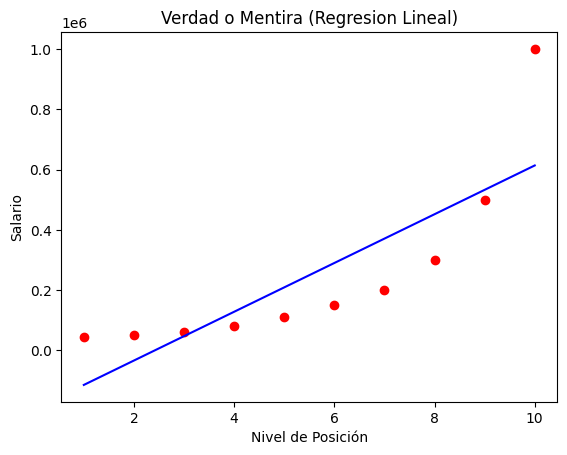

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regresor_lin.predict(X), color = 'blue')
plt.title('Verdad o Mentira (Regresion Lineal)')
plt.xlabel('Nivel de Posición')
plt.ylabel('Salario')
plt.show()

## Visualización de resultados con Regresión Polinomial

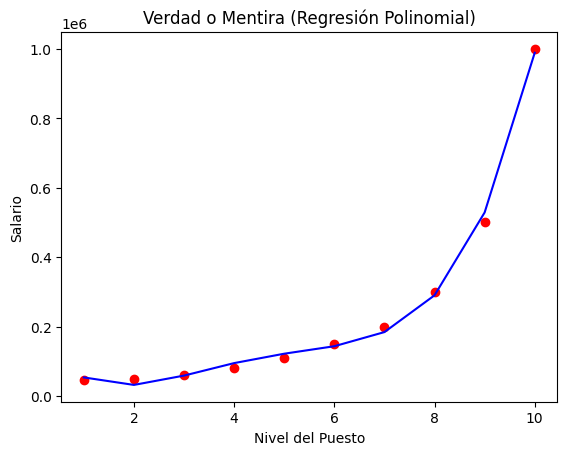

In [18]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regresor_lin_2.predict(regresor_poli.fit_transform(X)), color = 'blue')
plt.title('Verdad o Mentira (Regresión Polinomial)')
plt.xlabel('Nivel del Puesto')
plt.ylabel('Salario')
plt.show()

## Visualización de resultados con Regresión Polinomial (para una mayor resolución y una curva más suave)

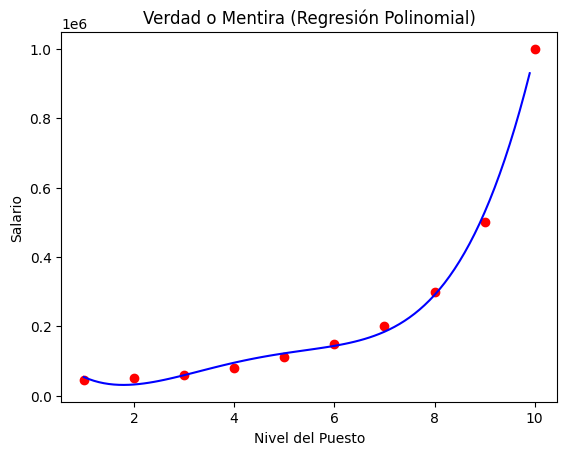

In [19]:
X_malla = np.arange(min(X), max(X), 0.1)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor_lin_2.predict(regresor_poli.fit_transform(X_malla)), color = 'blue')
plt.title('Verdad o Mentira (Regresión Polinomial)')
plt.xlabel('Nivel del Puesto')
plt.ylabel('Salario')
plt.show()

## Predicción de un resultado nuevo con Regresión Lineal

In [11]:
regresor_lin.predict([[6.5]])

array([330378.78787879])

## Predicción de un resultado nuevo con Regresión Polinomial

In [20]:
regresor_lin_2.predict(regresor_poli.fit_transform([[6.5]]))

array([158862.45265155])